In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

It is the main interest of this work, to analyze if difference exists between Urban Blocks with a high density of disabled people and the rest of Bloks. The data was obtained from the INEGI 2020 National Population Survey, which results were published at the beginning of 2021. 

Initially the dataset had 223 attributes grouped in 11 cathegories. These cathegories are: Population, Fertility, Migration, Ethnicity, Disability, Economic, Education, Health Services, Marital Status, Religion, Housing and Living. Only the Fertility cathegory was left out, since it was considered that the nature of the information did not concern this research. 

Next, a preprocessing was performed to clean the data from missing values and errors. It was discovered that the data contained a significican number of missing values,  with some attributes containing almost 50% of missing values. The table bellow presents the top 10 attributes with more missing values.

| Attribute 		| % of missing values |	
| :------------:| :------------------:|
| P15A17A			  |     	0.467695 |
| P15SEC_IN     |     	 0.465095 |
| P3A5_NOA      | 			 0.436261 |
| VPH_SINRTV    | 			 0.422730 |
| P18A24A       | 			 0.418624 |
| VPH_SINLTC    | 			 0.416349 |
| PCON_DISC     | 			 0.400957 |
| VPH_MOTO      | 			 0.385004 |
| VPH_1CUART    | 			 0.382020 |
| VPH_2CUART    | 			 0.380041 |
| VPH_CISTER    | 			 0.365210 |

The median of missing values per column was 20%. This value was taken as threshold to remove all the attributes with a higher rate. Only 38 of 223 attributes remained in the dataset, of which 6 are ID columns. Hence, the finall number of attributes are 32. Regarding the number of objects, the dataset contained some rows which represents agregation at different levels. These rows were removed, and the final object count was 33.8K objects.

The especific set of attributes is described in the table bellow:

| Attribute  | Description                                                          |
|------------|----------------------------------------------------------------------|
| GRAPROES   | Average education   level                                            |
| OCUPVIVPAR | Occupants in inhabitaded homes                                       |
| P12YM_CASA | Population with 12 yo or more married                                |
| P12YM_SOLT | Population with 12 yo or more single                                 |
| P18YM_PB   | Population with 18 years and more with   post-basic education        |
| PCATOLICA  | Population that are catholic                                         |
| PCON_DISC  | Population with disability                                           |
| PDER_SS    | Population affiliated to Seguro Social                               |
| PE_INAC    | Population not active economically                                   |
| PEA        | Population economically active                                       |
| PHOG_IND   | Population with Indigenous Homes                                     |
| PNACENT    | Population born in the state                                         |
| POBHOG     | Population in "hogares   censales"                                   |
| POBTOT     | Total Population                                                     |
| POTRAS_REL | Population with other religion                                       |
| PSIND_LIM  | Popilation without disability or   limitation                        |
| PSINDER    | Population without healt care afilliation                            |
| TOTHOG     | Total of "hogares censales"                                          |
| TVIVHAB    | Total of inhabited houses                                            |
| VIVTOT     | Total of Houses                                                      |
| VPH_2YMASD | Inhabited homes with two or more   bedroooms                         |
| VPH_3YMASC | Inhabited homes with 3 or more bedrooms                              |
| VPH_AEASP  | Inhabited homes with potable water,   supplied by the public network |
| VPH_AGUADV | Inhabited homes with potable water                                   |
| VPH_C_ELEC | Inhabited homes with electricity                                     |
| VPH_C_SERV | Inhabited homes with public services                                 |
| VPH_CEL    | Inhabited homes with mobile cellphone                                |
| VPH_EXCSA  | Inhabited homes with toilet                                          |
| VPH_LETR   | Inhabited homes with water well or latrine                           |
| VPH_REFRI  | Inhabited homes with refrigerator                                    |
| VPH_TINACO | Inhabited homes with Tinaco                                          |
| VPH_TV     | Inhabited homes with television                                      | 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
input_file = './drive/Shareddrives/CS5056.500 Data Analytics/datos INEGI/datos_clean.csv'
df = pd.read_csv( input_file, index_col = 'index' )

ID_COLS = ['MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA' ]
ATT_COLS = [ c for c in df.columns if c not in ID_COLS ]

df_data = df[ ATT_COLS ]

print( 'Initial shape:', df_data.shape )

Initial shape: (33849, 32)


## Attributes Dispersion

As it was mention, there are 32 attribute with almost 34k objects. The data does not contain null values since they were removed or imputated during the data preparation. It is observed the mean, min, and max values for every attribute in the table bellow. However, due to the high number of. attributes, it is difficult to observe anomalies and patterns in the data. To overcome this obstacle, a. heatmap visualization was generated and presented bellow.

In [ ]:
df_data.describe()

,POBTOT,PNACENT,PHOG_IND,PCON_DISC,PSIND_LIM,P18YM_PB,GRAPROES,PEA,PE_INAC,PSINDER,PDER_SS,P12YM_SOLT,P12YM_CASA,PCATOLICA,POTRAS_REL,TOTHOG,POBHOG,VIVTOT,TVIVHAB,OCUPVIVPAR,VPH_2YMASD,VPH_3YMASC,VPH_C_ELEC,VPH_AGUADV,VPH_AEASP,VPH_TINACO,VPH_EXCSA,VPH_LETR,VPH_C_SERV,VPH_REFRI,VPH_TV,VPH_CEL
count,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000,33849.000000
mean,58.933794,57.125439,25.357365,4.740691,54.213825,24.407191,9.880247,33.608914,20.773406,16.155265,51.162475,18.620700,29.860776,49.777662,0.052387,18.903129,65.973919,21.387722,17.485846,65.973919,12.771432,14.667958,18.813104,18.751216,18.224804,16.062434,18.110843,0.042897,17.965593,17.090950,17.780906,17.477900
std,53.438848,43.204071,29.141056,3.767689,42.176800,22.603963,2.521569,26.129106,15.792059,13.826799,39.018558,14.170906,22.513537,38.891194,0.456141,14.027942,49.548692,18.334908,14.794993,49.548692,9.823247,11.807014,13.950899,13.909014,13.666420,12.416143,13.612875,0.473706,13.538150,13.051701,13.217657,13.213475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,29.000000,7.000000,3.000000,28.000000,11.000000,8.100000,17.000000,11.000000,8.000000,27.000000,10.000000,16.000000,25.000000,0.000000,10.000000,35.000000,10.000000,8.000000,35.000000,7.000000,8.000000,10.000000,10.000000,10.000000,8.000000,10.000000,0.000000,10.000000,9.000000,10.000000,9.000000
50%,50.000000,54.000000,20.000000,4.740691,51.000000,23.000000,9.880247,32.000000,20.000000,16.000000,49.000000,18.000000,28.000000,47.000000,0.000000,18.000000,63.000000,18.000000,16.000000,63.000000,12.771432,14.667958,18.000000,18.000000,18.000000,16.000000,18.000000,0.000000,17.965593,17.000000,17.000000,17.000000
75%,81.000000,70.000000,28.000000,5.000000,66.000000,29.000000,11.300000,41.000000,25.000000,19.000000,63.000000,22.000000,36.000000,61.000000,0.000000,23.000000,81.000000,29.000000,23.000000,81.000000,15.000000,17.000000,23.000000,23.000000,23.000000,19.000000,22.000000,0.000000,22.000000,21.000000,22.000000,21.000000
max,1679.000000,1373.000000,536.000000,89.000000,1515.000000,646.000000,19.440000,885.000000,435.000000,434.000000,1236.000000,413.000000,765.000000,1123.000000,13.000000,508.000000,1679.000000,592.000000,508.000000,1679.000000,380.000000,447.000000,508.000000,506.000000,503.000000,477.000000,504.000000,30.000000,501.000000,468.000000,470.000000,486.000000


The figure bellow presents the Heatmap of the attributes values. For each attribute, the attribute's scale range was equally divided into 100 bins, i.e., each bin representes the ith quantile of the attribute. The quantiles are presented in the horizontal axis. Each row representes an attribute, and for each quantile the intensity of the color representes the amount of objects in that quantile. The color scale is observed on the right side of the plot. It can be observed that there are two attribute with an extreme dense behaviour. These attributes are POTRAS_REL and VPH_LETR, which corresponds to the population wich practice a protestant religion and the number of homes with letrine respectively. It can be seen that those attributes concetrates almost all of its values in the first quantile, leaving the rest of quantiles almost empty. For this reason, it was decided to remove such attributes.

Text(248.09375, 0.5, 'attributes')

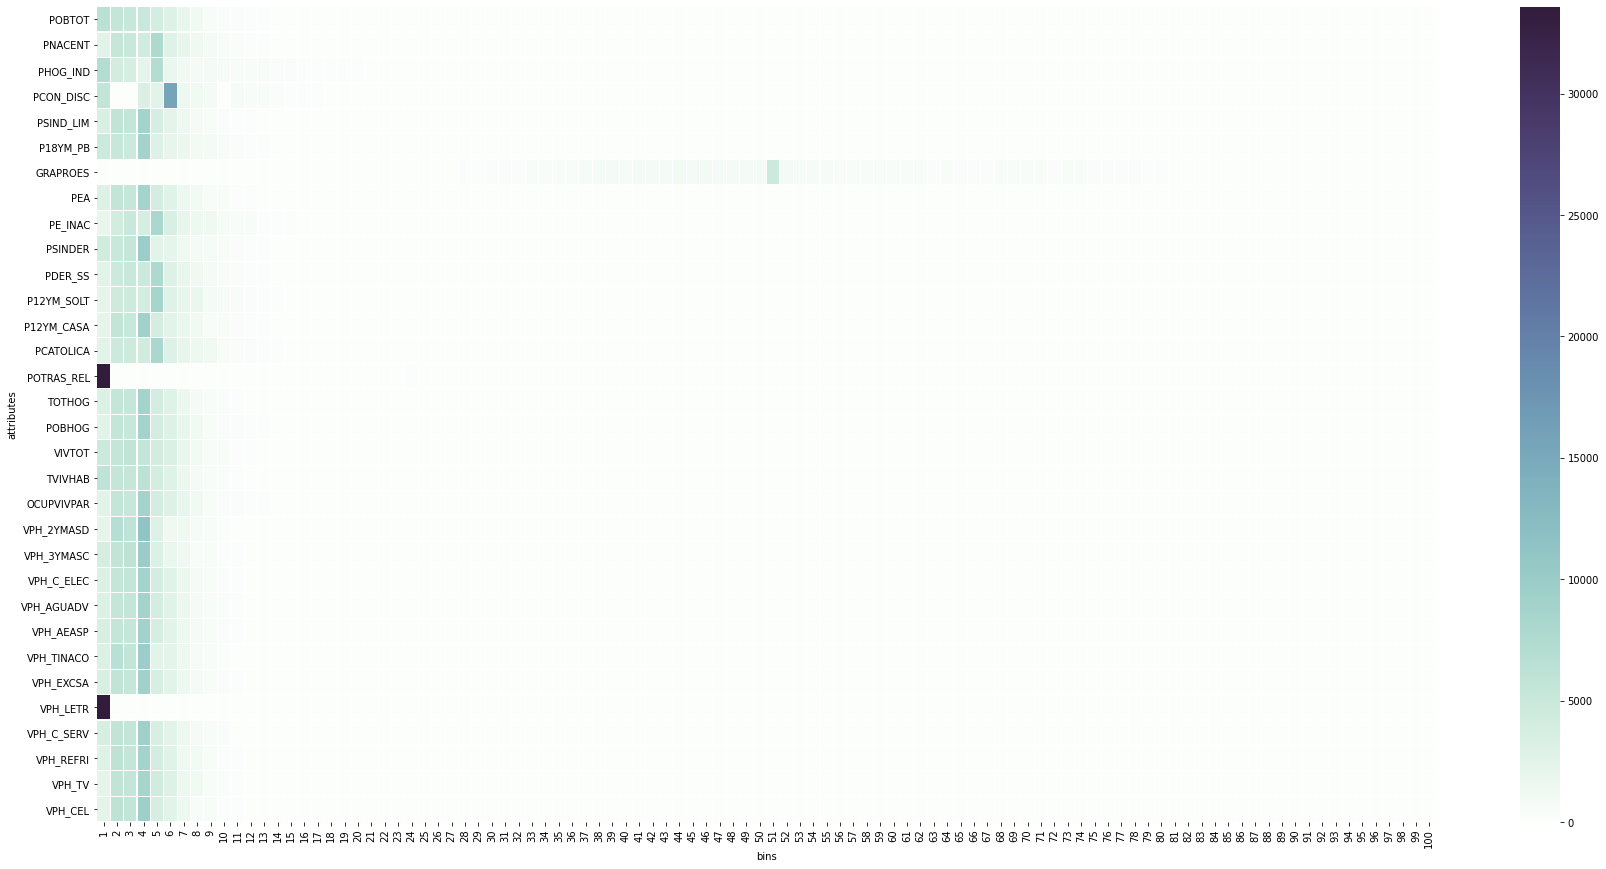

In [ ]:
# Generating the attributes heatmap

heat_matrix = []
for c_name in df_data.columns:
  c = df_data[ c_name ]
  temp = pd.cut( x = c, bins = 100, labels = np.arange( 1, 101, 1 ) ).value_counts()
  temp.sort_index( inplace = True )
  heat_matrix.append( temp )

heat_matrix = np.array( heat_matrix ).reshape( len( heat_matrix ),  100 )
temp = pd.DataFrame( heat_matrix, columns = np.arange( 1, 101 ), index = df_data.columns )

fig, ax = plt.subplots( figsize = ( 30, 15 ) )
cmap = sns.cubehelix_palette( start = .5, rot = -.5, light = .99, as_cmap = True )
sns.heatmap( temp, linewidths = 0.02, cmap = cmap )
ax.set_xlabel( 'bins' )
ax.set_ylabel( 'attributes' )

The heatmap was generated again after removing POTRAS_REL adn VPH_LETR. It can be seen. that the color scale reduced to litle more thatn 14k objects. This means, now there are not any quantile that concentrates more than 50% of the number total of objects. Regarding the rest of attributes, a clear skewness to the left side of the ranges can be seen. It means for every attribute, most of the data is in the first quantiles and very few objects are in the rest of quantiles. The only exception to this behaviour is the attribute GRAPROES, which corresponds to the average education level. It presents a sparser distribution very center in the middle of the range (quantile 50). 



Text(113.09375, 0.5, 'attributes')

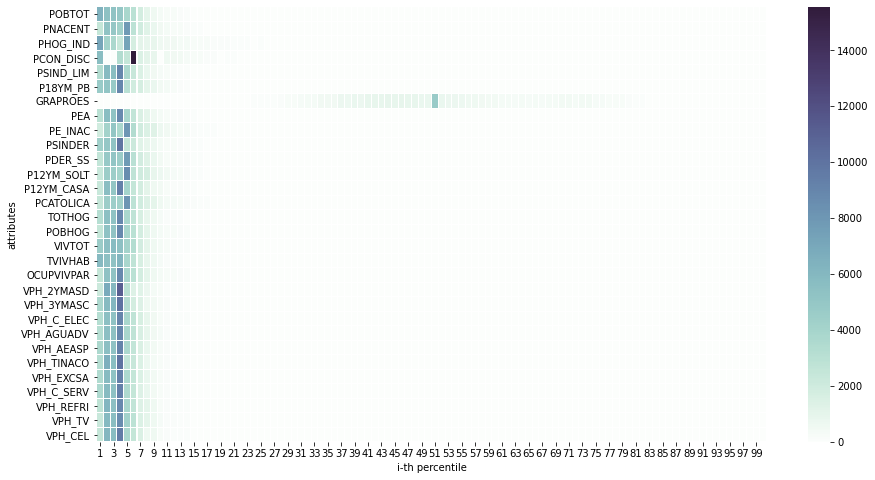

In [ ]:
fig, ax = plt.subplots( figsize = ( 15, 8 ) )
sns.heatmap( temp.drop( [ 'POTRAS_REL', 'VPH_LETR' ] ), linewidths = 0.02, cmap = cmap )
ax.set_xlabel( 'i-th percentile' )
ax.set_ylabel( 'attributes' )

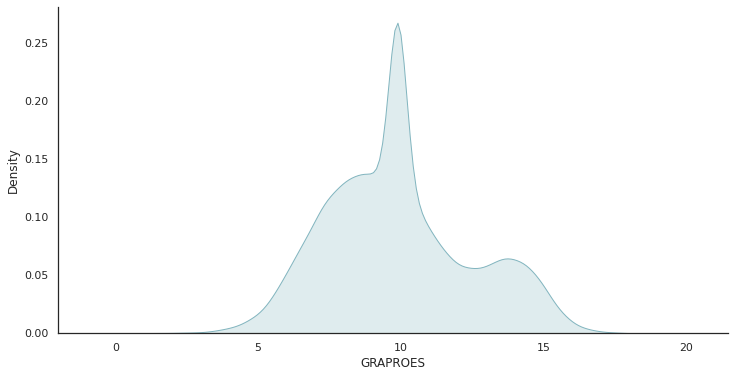

In [ ]:
sns.set_theme( style = 'white' )

fig, ax = plt.subplots( figsize = ( 12, 6 ) )
sns.kdeplot( df_data[ 'GRAPROES' ], fill = True, color = cmap( 0.4 ) )
ax.spines[ 'top' ].set_visible( False )
ax.spines[ 'right' ].set_visible( False )

To complement the visualization fo the heatmap, a boxlpot was generated using all the attributes. The result is showed bellow. It can be observed that the plot confirmed the left skeweness observed in the heatmap. Furthermore, it is observed that using the interquantile range equation [1](https://en.wikipedia.org/wiki/Interquartile_range) a large number of outliers is detected. However the plot vertical axis is limited to 800 (for a better visualization), the vertical axis extends beyond 1500, where many outliers are still present.

Another characteristic is that most of the attributes are reasonable in the same range of values. This is important when mmodeling techniques are applied, since a signficant difference in attributes scale may cause some attribute dominating over others, hence, introducing a bias in the results [2](http://Kubat.2017).  

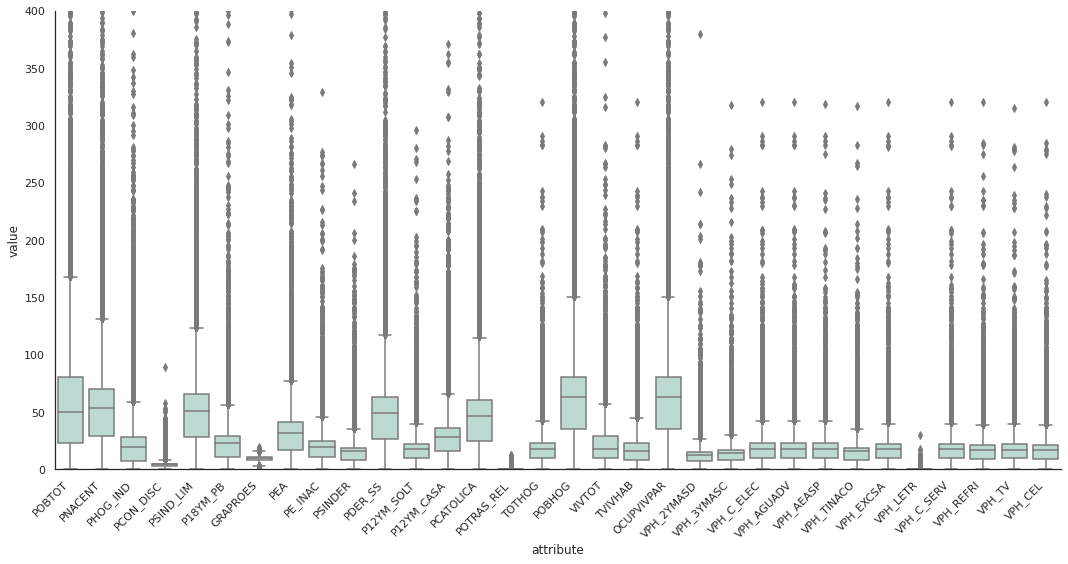

In [ ]:
sns.set_theme( style = 'white' )

colors = sns.color_palette( 'mako', 32 )

fig, ax = plt.subplots( figsize = ( 15, 8 ) )
sns.boxplot( data = pd.melt( df_data ), x = 'variable', y = 'value', color = cmap( .2 ) )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right' )
ax.set_xlabel( 'attribute' )
ax.set_ylim( ( 0, 400 ) )
ax.spines[ 'top' ].set_visible( False )
ax.spines[ 'right' ].set_visible( False )
fig.tight_layout()

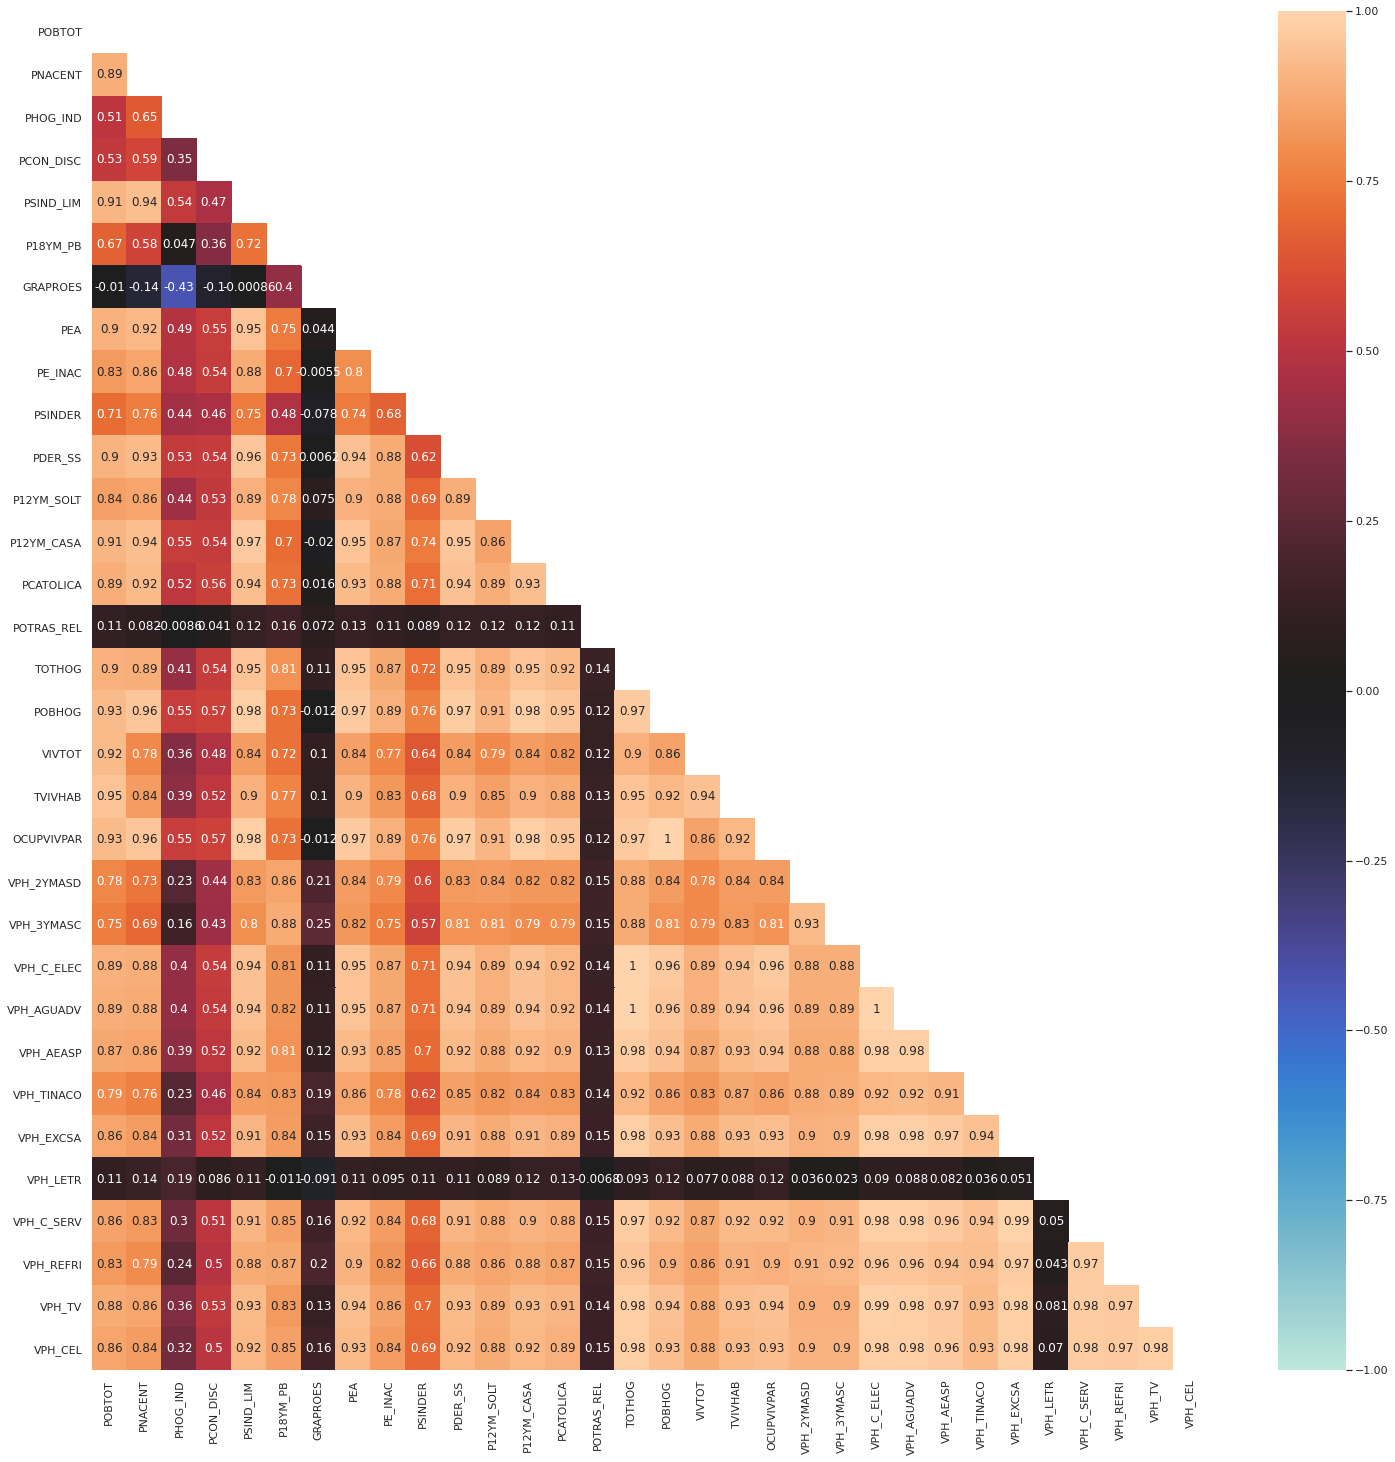

In [ ]:
cols = [ c for c in df_data.columns if c not in [ 'HIGH_DENSITY', 'PCON_DENSITY' ] ]
corr_df = df_data[ cols ].corr( method = 'pearson' ) 
mask_ut = np.triu( np.ones( corr_df.shape ) ).astype( np.bool )

_, ax = plt.subplots( figsize = ( 25, 25 ) ) 
akws = { 'ha': 'center','va': 'center' }
hmap = sns.heatmap( corr_df, ax = ax, mask = mask_ut, annot = True, vmin = -1, vmax = 1, center = 0 )

## Gini Coefficient

Additionally, two techniques will be used to analyze the dispersion of the data: the Lorenz curve and the Gini Coefficient. 

On the one hand, the Lorenz curve presents "the percentage of the total income earn by various portions of the population when the population is ordered by income" [gastwirth1971general].  On the other hand, the Gini coefficient was defined by Corrado Gini as a measure of variability of any statistical distribution [dorfman1979formula]. Gini coefficient can be defined as follows: 

$G = \frac{A}{A + B}$

![Gini Coefficient](https://2.bp.blogspot.com/-GZ9_VjNqxA8/WIGQeqZU1EI/AAAAAAAAA4c/mi6k9wHIE2YwuGCglSCaNeC5_lcfvjixACLcB/s400/kurva%2Blorenz.gif)

In simple words, the meaning of the Gini coefficient indicates how much a data dispersion deviates from the perfect equality. For example, a population with 99\% of the individuals with zero income and 1\% of the individuals with the rest of the income would have an Gini coefficient of $G = 1.0$, i.e., a completely unequal population. 

Although, the Gini coefficient and the Lorenz Curve born within Economic Science, they have been used in other domains as agriculture, sociology, ecology and biology [sadras2004use]. In computer science field, Gini coefficient has been used for analyzing the distribution of features among classes [sanasam2010feature]. In the specific context of this research, the Gini index will tell how equal the increments are distributed among the observed range. This will help to identify different variation patterns observed between Urban Blocks with a high density of disable people and the rest of Blocks.

In [ ]:
### Author: Olivia Guest (oliviaguest)
### Original publication of this code available at https://github.com/oliviaguest/gini/blob/master/gini.py

import numpy as np

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
# removing unused columns

df_data = df_data.drop( columns = [ 'POTRAS_REL', 'VPH_LETR' ] )

Bellow a ranked list of the Gini coefficient of each attributes is shown. It is observed that the highest value is 0.52 corresponding to PHOG_IND; the lowest value is GRAPROES with. 0.14.


In [ ]:
df_gini = df_data.apply( lambda x: gini( np.array( x.astype( 'float' ) ) ) ).sort_values( ascending = False )
df_gini

PHOG_IND      0.521526
POBTOT        0.434965
VIVTOT        0.400060
P18YM_PB      0.399128
TVIVHAB       0.397595
PSINDER       0.389444
PCATOLICA     0.361699
PNACENT       0.358443
PEA           0.357429
PCON_DISC     0.356349
PSIND_LIM     0.352384
PE_INAC       0.352125
PDER_SS       0.349840
P12YM_SOLT    0.348113
VPH_3YMASC    0.347691
VPH_TINACO    0.346772
POBHOG        0.345484
OCUPVIVPAR    0.345484
P12YM_CASA    0.344346
VPH_REFRI     0.341692
VPH_AEASP     0.341305
VPH_C_SERV    0.338732
VPH_EXCSA     0.338174
VPH_CEL       0.337480
TOTHOG        0.337182
VPH_AGUADV    0.336323
VPH_C_ELEC    0.336307
VPH_TV        0.334836
VPH_2YMASD    0.329577
GRAPROES      0.143286
dtype: float64

A visualization for the top three and bottom three attributes was generaged. The figure is presented bellow, and top three attributes are presented in lila, wihle the bottom three are presented in yellow. It is observed that the curve for the top tree (the ones with the higher Gini score) is notable more pronounced than the bottom three. It is also observed that, for the case of GRAPROES, the attribute with the lowest score, the area is close to the ideal line. This plot tell us that in general, the Population in Indigenous Homes is less equally distributed than the Education Level. This will help us to compare how the data dispersion change when it is partitioned by Disabled Population Density.

In [ ]:
from matplotlib.ticker import FuncFormatter, EngFormatter

top_bottom = list( df_gini.index.values[ :3 ] ) + list( df_gini.index.values[ len( df_gini.index.values ) - 3 : ] )

# helper functions

def thousands_formatter( x, p ):
  return ( str( int( x / 1000 ) ) + 'K' if x > 1000 else x )

def plot_lorenz( data, gini, name, color, ax ):
  percentiles = range( 1, 101 )
  data_sorted = data.sort_values()
  cum_data = [ np.percentile( data_sorted.cumsum(), i ) for i in percentiles ]

  line = ax.bar( percentiles, cum_data, color = color )[ 0 ]
  ax.plot( percentiles, cum_data, color = 'black', lw = 1.5, linestyle = '--' )
  ax.plot( percentiles, np.linspace( np.min( cum_data ), np.max( cum_data ), 100 ), color = 'grey', lw = 1.5, linestyle = '--' )

  ax.set_xlabel( 'Percentile' )
  ax.set_ylabel( 'Cumulative Sum of: ' + name )
  ax.text( 0, cum_data[ -2 ], '%s\nGini = %.3f' % ( name, gini ) )

  ax.spines[ 'top' ].set_visible( False )
  ax.spines[ 'right' ].set_visible( False )
  ax.get_yaxis().set_major_formatter( FuncFormatter( thousands_formatter ) )

  return line

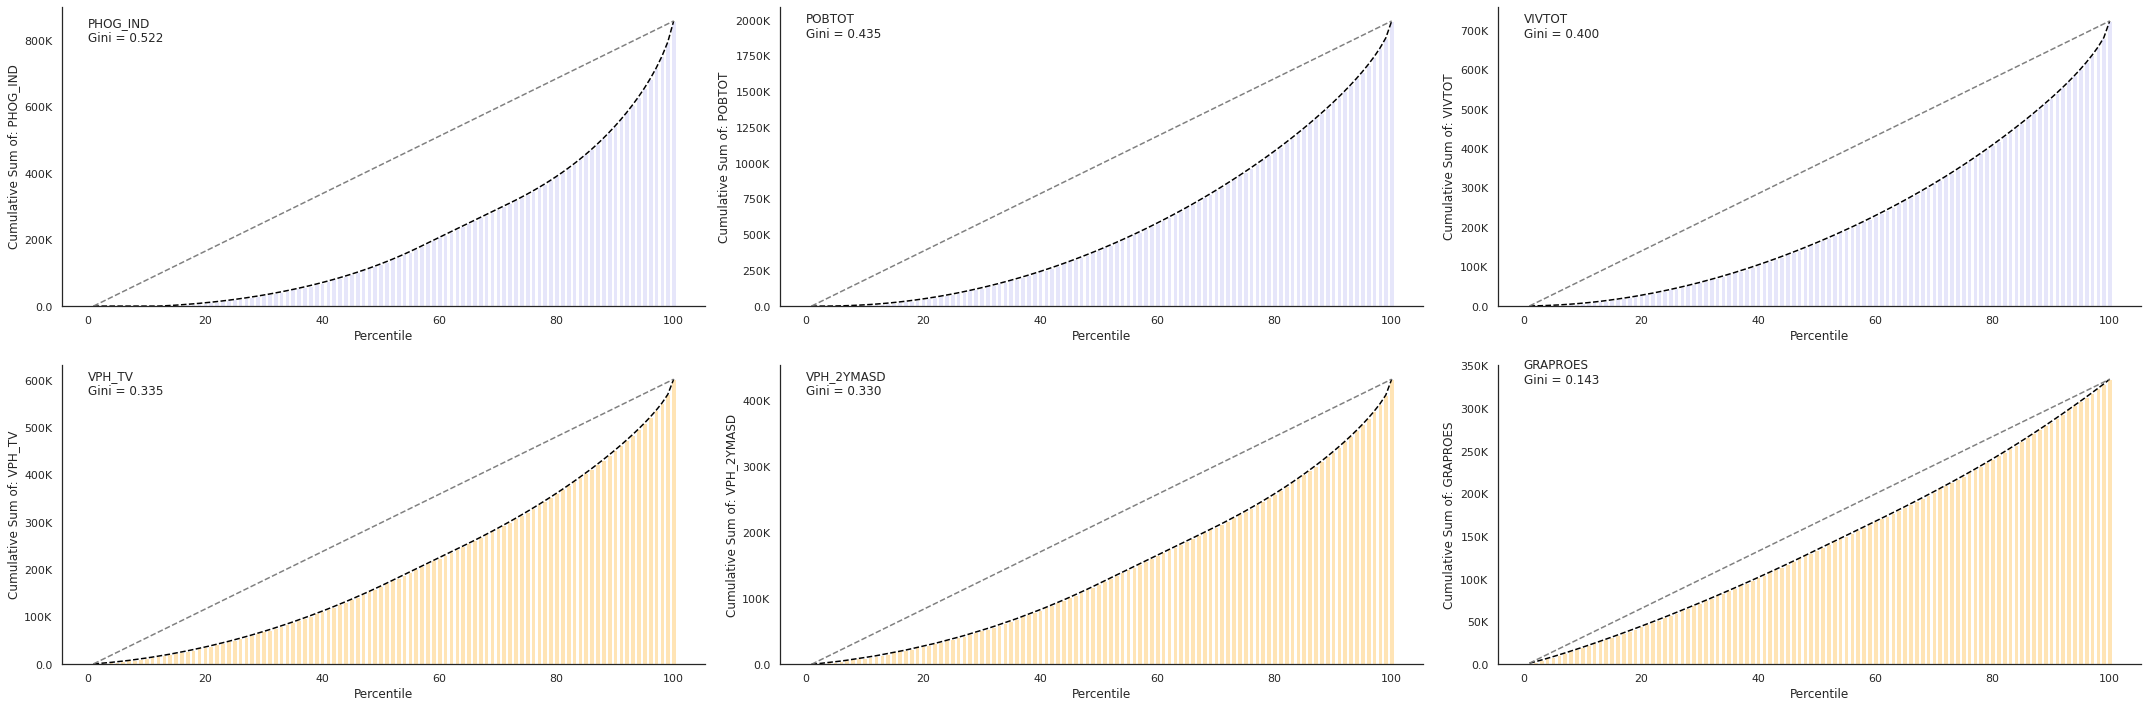

In [ ]:
fig, ax = plt.subplots( 2, 3, figsize=( 30, 10 ) )
colors = [ 'lavender', 'moccasin' ]

for i, column in enumerate( top_bottom ):
  l = plot_lorenz( df_data[ column ], df_gini[ column ], column, colors[ i // 3 ], ax[ i // 3, i % 3 ] )

fig.tight_layout()

### Comparing Gini Coefficientes between Urban Blocks with High Density of People with Disability


Foremost, the following equation it is used to calculate the density for each Urban Block: 

$\frac{PCON\_DISC}{POPTOT}$

where PCON_DISC is the number of people with disability in the Block, and POPTOT is the total population of the Block. It was found that the min value is zero, which means Blocks without people with disability, and the max value is 4.7. Also, a mean value of 0.20 was found. 

In [ ]:
invalid_rows = df_data[ ( df_data[ 'POBTOT' ] == 0 ) | ( df_data[ 'POBTOT' ] < df_data[ 'PCON_DISC' ] ) ]
df_data.drop( invalid_rows.index, inplace = True )

df_data[ 'PCON_DENSITY' ] = df_data[ 'PCON_DISC' ] / df_data[ 'POBTOT' ]
df_data[ 'PCON_DENSITY' ].describe()

count    31381.000000
mean         0.116302
std          0.158340
min          0.000000
25%          0.039506
50%          0.074766
75%          0.126437
max          0.948138
Name: PCON_DENSITY, dtype: float64

Next, it is necessary to define the threshold that delimits the high density from the low density. A plot of the objects sorted by density is presented in the figure bellow. Using the criteria of the "elbow curve", it is observed that around 0.4, the densities incrementes exponentialy. hence this value was selected as partition threshold. However, this selection has the disadvantage of creating a highly umbalanced partitions. The High density partition contains 2948 objects, while the low density partition contains 29.6k objects, almost 10 times more objects.


Text(0, 0.5, 'PCON_DENSITY')

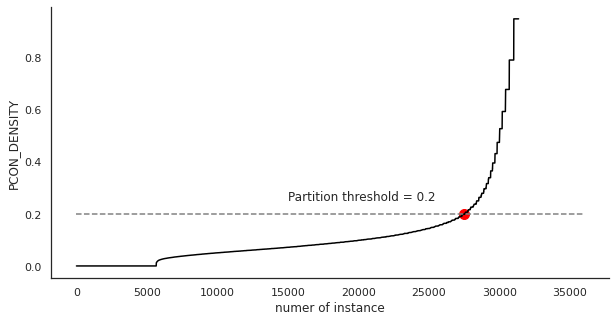

In [ ]:
temp = df_data[ 'PCON_DENSITY' ].sort_values()
threshold = 0.2

fig, ax = plt.subplots( figsize = ( 10, 5 ) )
sns.lineplot( x = range( len( temp ) ), y = temp.values, color = 'black'  )
plt.plot( [ 0, 36000 ], [ threshold, threshold ], color='grey', linestyle = '--', lw = 1.5 )

plt.scatter( x = [ 27500 ], y = [ threshold ], color = 'red', s = 100  )
ax.text( 15000, 0.25, 'Partition threshold = 0.2' )

ax.spines[ 'top' ].set_visible( False )
ax.spines[ 'right' ].set_visible( False )
ax.set_xlabel( 'numer of instance' )
ax.set_ylabel( 'PCON_DENSITY' )

In [ ]:
df_data[ 'HIGH_DENSITY' ] =  df_data[ 'PCON_DENSITY' ].transform( lambda x: x > 0.2 )
df_data.groupby( 'HIGH_DENSITY' )[ 'POBTOT' ].count()

HIGH_DENSITY
False    29694
True      1687
Name: POBTOT, dtype: int64

The Gini coeficientes where calculated for each attribute in both partitions. The results are displayed in the table bellow (sorted by High Density column in descending manner). It is noticed that some variations ocurried in the attributes comparing with the general top and bottom three

In [ ]:

df_gini_high = df_data.loc[ :, df_data.columns[ : -2 ] ][ df_data[ 'HIGH_DENSITY' ] ].apply( lambda x: gini( np.array( x.astype( 'float' ) ) ) ).sort_values( ascending = False )
df_gini_low = df_data.loc[ :, df_data.columns[ : -2 ] ][ df_data[ 'HIGH_DENSITY' ] == False ].apply( lambda x: gini( np.array( x.astype( 'float' ) ) ) ).sort_values( ascending = False )
df_gini_disc = pd.DataFrame( { 'High Density': df_gini_high, 'Low Density': df_gini_low } ).sort_values( ascending = False, by = 'High Density' )

print( 'Top 3 attributes' )
print(df_gini_high.head( 3 ))
print()
print(df_gini_low.head( 3 ))

print()
print( 'Bottom 3 attributes' )
print(df_gini_high.tail( 3 ))
print()
print(df_gini_low.tail( 3 ))

Top 3 attributes
VIVTOT     0.380921
TVIVHAB    0.228435
POBHOG     0.192512
dtype: float64

PHOG_IND    0.556573
P18YM_PB    0.427148
PSINDER     0.418769
dtype: float64

Bottom 3 attributes
VPH_2YMASD    0.069475
GRAPROES      0.067089
PCON_DISC     0.011589
dtype: float64

VPH_2YMASD    0.355765
VIVTOT        0.346012
GRAPROES      0.152632
dtype: float64


### Comparing the Top 3 and Bottom 3 Attributes

A visualization of the attributes defined as top three and bottomm three before partitioning was made to analizy how the Gini scores where affected. Let us start by the top three: PHOG_IND, POBTOT, and VIVTOT. For the case of the low density Blocks, it is observed that the PHOG_IND increased from 0.522 to 0.577. For the other two attributes the scores decreased a little. In general, it where no big changes regarding the general scores. Regarding the High Density Blocks, the PHOG_IND attribute, noticeble decreased to 0.1, getting close to the ideal line. This indicates a change in the distritbution of the data respect of the general scores.

['PHOG_IND', 'POBTOT', 'VIVTOT']
['PHOG_IND', 'POBTOT', 'VIVTOT']


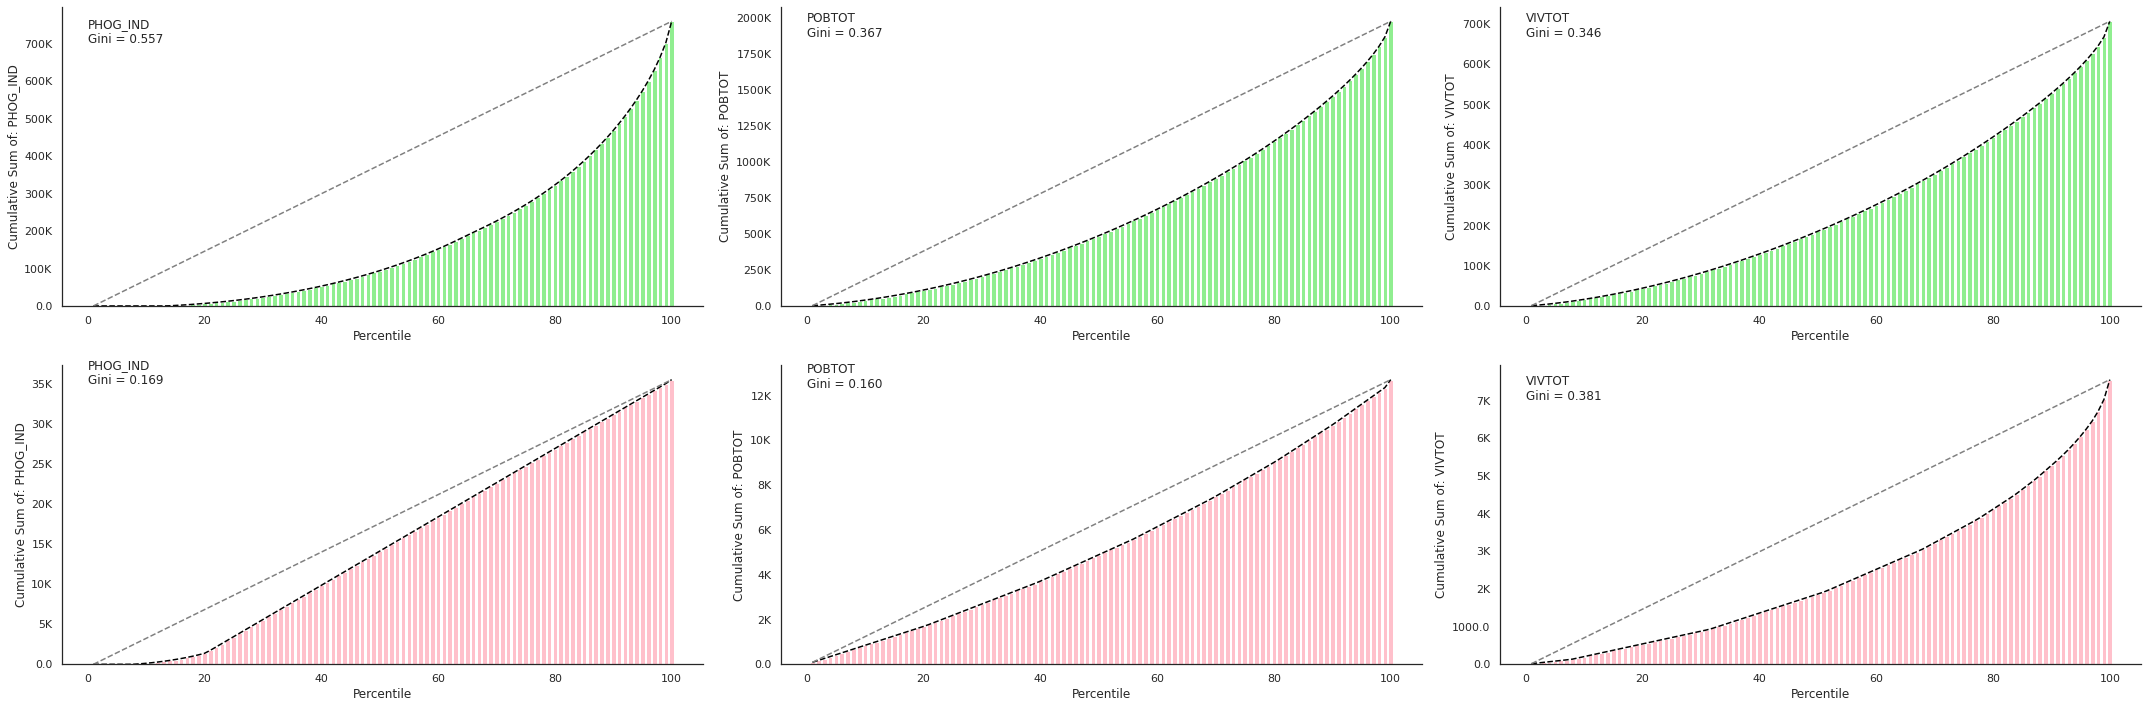

In [ ]:
fig, ax = plt.subplots( 2, 3, figsize=( 30, 10 ) )
colors = [ 'lightgreen', 'pink' ]

for name, g in df_data.loc[ :, df_data.columns[ : -2 ] ].groupby( df_data[ 'HIGH_DENSITY' ] ):
  row = 1 if name else 0
  data = df_gini_high if name else df_gini_low

  print( top_bottom[ : 3 ] )

  for i, c in enumerate( top_bottom[ : 3 ] ):
    plot_lorenz( g[ c ], data[ c ], c, colors[ row ] , ax[ row, i ] )

# Create the legend

# fig.legend([l1, l2, l3, l4],     # The line objects
#   labels=line_labels,   # The labels for each line
#   loc="center right",   # Position of legend
#   borderaxespad=0.1,    # Small spacing around legend box
#   title="Legend Title"  # Title for the legend
# )
fig.tight_layout()

The figure bellow presented the Lorenz curve for the bottom three attributes ( VPH_TV, VPH_2MASD, and GRAPROES) for the high density (pink) and low density (green) partitions. It is observed that for the low density partition, the values observed do not distance too much from the general thrend. However, for the high density attributes, it is observed they obtained ignificant lower scores, resulting in the curve getting significantly closer to the ideal line. This strongly suggest that a difference exists in the data distribution between partitions.


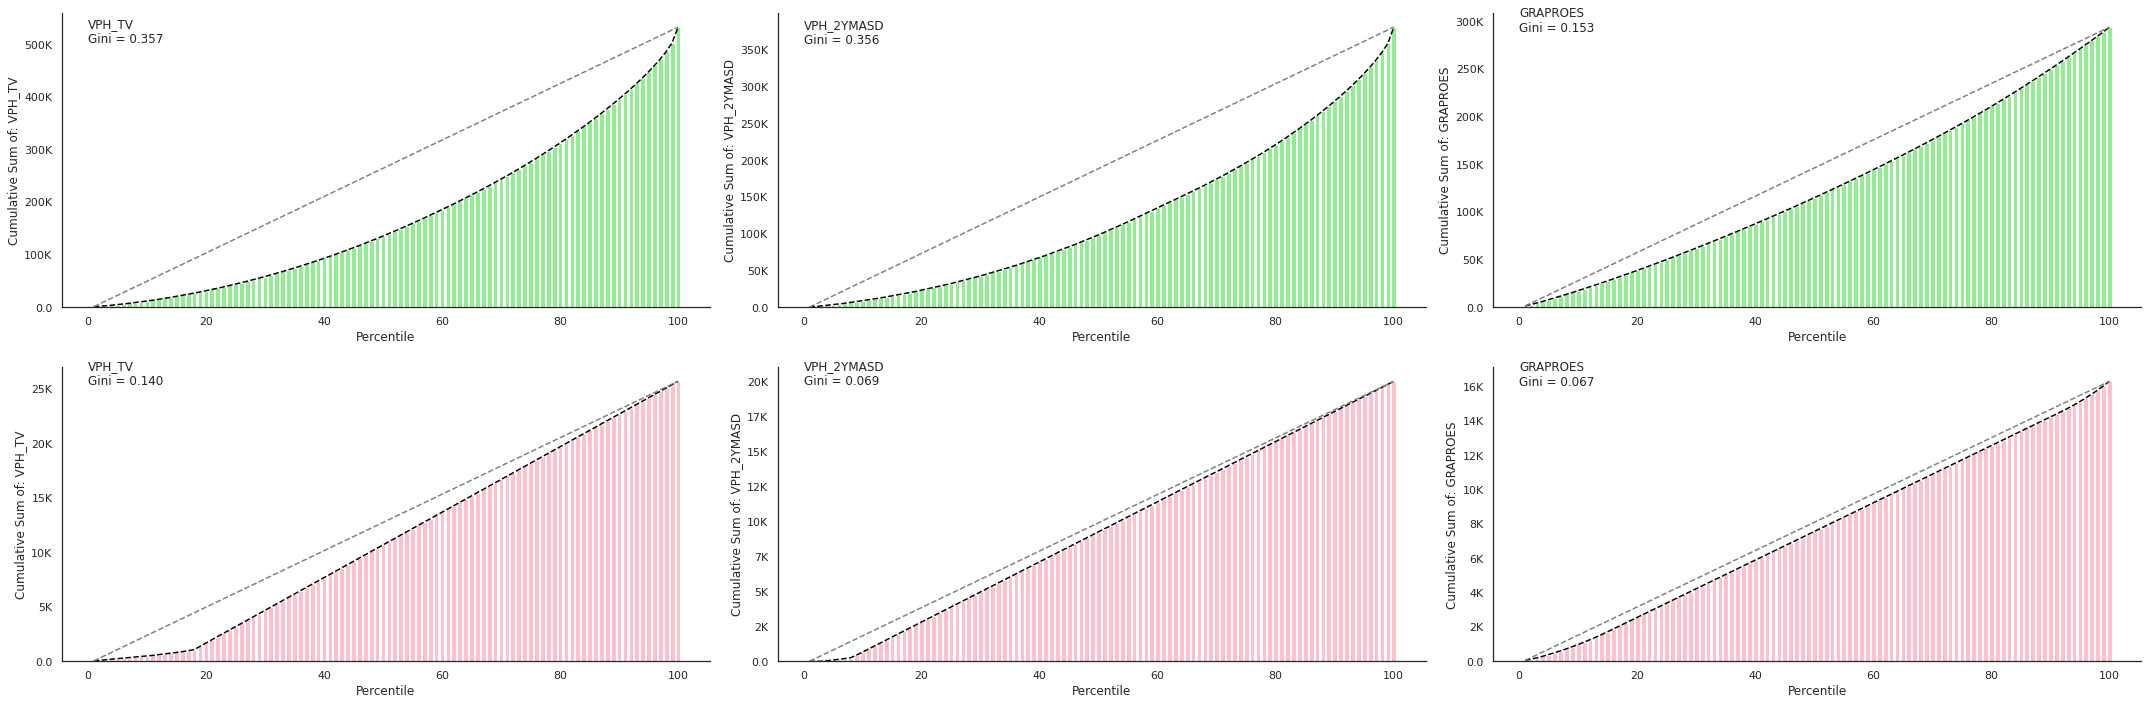

In [ ]:
fig, ax = plt.subplots( 2, 3, figsize=( 30, 10 ) )
colors = [ 'lightgreen', 'pink' ]

for name, g in df_data.loc[ :, df_data.columns[ : -2 ] ].groupby( df_data[ 'HIGH_DENSITY' ] ):
  row = 1 if name else 0
  data = df_gini_high if name else df_gini_low

  for i, c in enumerate( top_bottom[ 3 :  ] ):
    plot_lorenz( g[ c ], data[ c ], c, colors[ row ] , ax[ row, i ] )

fig.tight_layout()

### Comparing Gini Coefficients distribution by Disability Density

A kernel density estimation for the gini scores of each partition was made. The figure bellow presents the results. It is observed that a difference in the scores distribution between partitions exists. It can be seen the High Density partition has a mean value aroun 0.15, while the Low Density partition presents a higher mean value around 0.38. This evidence strongly suggest that the data distribution of the values between partitions is different; furthermore, it can be said that in general the life conditions among Urban Blocks with a High Density of disabled people are more similar than among Urban Blocks with a Low Density of disabled poeple.

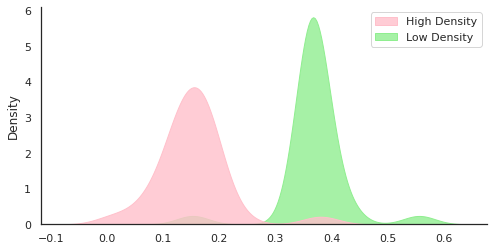

In [ ]:
fig, ax = plt.subplots( figsize = ( 8, 4 ) )
sns.kdeplot( data = df_gini_disc, shade = True, palette = [ 'pink', 'lightgreen' ], alpha = .8 ) 
ax.spines[ 'top' ].set_visible( False )
ax.spines[ 'right' ].set_visible( False )